# Popularity Prediction / 30'000 songs Spotify

By: Ing. Martin Farfan

https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs/data

**OBJECTIVE**

- To determine the popularity of a song depending on the features (genre, danceability, etc), including time from release.


- Would be interesting to check the evolution of the musical features in time. 
- Also would be interesting to see if the different features can classify well enough various genres. 

# 1. IMPORT LIBRARIES

In [1]:
# DATA PROCESSING
import pandas as pd # data processing
import numpy as np
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns #Python library for Visualization

# 2. READ THE DATA

In [2]:
import kaggle

kaggle.api.authenticate()
kaggle.api.dataset_download_files('joebeachcapital/30000-spotify-songs',
                                  path='.')

Dataset URL: https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs


In [3]:
import zipfile
import io

# Read from zip without extracting
with zipfile.ZipFile('./30000-spotify-songs.zip', 'r') as z:
    # See what files are there
    print("Archivos en el zip:", z.namelist())
    # Read directly from the zip file
    with z.open('spotify_songs.csv') as f:
        spotifyRaw = pd.read_csv(f)

Archivos en el zip: ['readme.md', 'spotify_songs.csv']


In [4]:
spotifyRaw.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


# 3. CLEANING THE RAW DATASET

- track_id	character	Song unique ID
- track_name	character	Song Name
- track_artist	character	Song Artist
- track_popularity	double	Song Popularity (0-100) where higher is better
- track_album_id	character	Album unique ID
- track_album_name	character	Song album name
- track_album_release_date	character	Date when album released
- playlist_name	character	Name of playlist
- playlist_id	character	Playlist ID
- playlist_genre	character	Playlist genre
- playlist_subgenre	character	Playlist subgenre
- danceability	double	Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- energy	double	Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- key	double	The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- loudness	double	The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
- mode	double	Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- speechiness	double	Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- acousticness	double	A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
instrumentalness	double	Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
liveness	double	Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
valence	double	A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- tempo	double	The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- duration_ms	double	Duration of song in milliseconds

## 3.1 Handling Missing Values

In [5]:
# Check for missing values
missing_values = spotifyRaw.isnull().sum()

# Display the count of missing values for each column
print("Missing Values Summary:")
print(missing_values)

Missing Values Summary:
track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


In [6]:
spotifyRaw.iloc[96]

track_id                    1lGVyEkGHUz7Pg78QGaS4a
track_name                                  Wanted
track_artist                                  NOTD
track_popularity                                70
track_album_id              5sPC6RYCERdNCzHLRf9zHb
track_album_name                            Wanted
track_album_release_date                2019-09-27
playlist_name                            Dance Pop
playlist_id                 37i9dQZF1DWZQaaqNMbbXa
playlist_genre                                 pop
playlist_subgenre                        dance pop
danceability                                 0.693
energy                                       0.674
key                                              5
loudness                                    -4.449
mode                                             1
speechiness                                 0.0723
acousticness                                 0.185
instrumentalness                               0.0
liveness                       

In [7]:
bool_idx = spotifyRaw.isnull().any(axis=1)
spotifyRaw[bool_idx]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
8151,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,HIP&HOP,5DyJsJZOpMJh34WvUrQzMV,rap,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707
9282,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,11,-5.364,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235
9283,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,10,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465
19568,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,Reggaeton viejito🔥,0si5tw70PIgPkY1Eva6V8f,latin,...,11,-6.075,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773
19811,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,latin hip hop,3nH8aytdqNeRbcRCg3dw9q,latin,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707


are This songs not important?

In [8]:
spotifyRaw[spotifyRaw.track_popularity == 0]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
476,1gsb4CFzUMERAkfzAKwrZu,Siren,SUNMI,0,75eIP5pPvtQCB0bAz2TEsU,WARNING,2018-09-26,K-Party Dance Mix,37i9dQZF1DX4RDXswvP6Mj,pop,...,9,-3.885,0,0.0385,0.011900,0.000000,0.0887,0.545,122.051,197252
772,4yEXem27DzCg8xytvvO3E9,Lollipop (Candyman),Aqua,0,2vb252Haz9iX4iOd7vP8kX,Greatest Hits,2009-01-01,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,...,0,-3.612,0,0.0310,0.031700,0.007400,0.1710,0.861,139.047,215053
801,7vHkU1H73z5NVbGTIyI1DG,Around The World,Aqua,0,2vb252Haz9iX4iOd7vP8kX,Greatest Hits,2009-01-01,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,...,6,-3.847,1,0.0312,0.003320,0.000182,0.5370,0.969,129.934,209120
883,3decfgk2pFkvCzYUFj6ssf,I'm Yours,Influencers Worship,0,2FQCn5R6hSDeGYgUCW5kN9,I'm Yours,2018-07-06,Christian Dance Party,37i9dQZF1DWUUPO0Sbx2CM,pop,...,11,-6.397,0,0.0557,0.000186,0.000994,0.1690,0.357,127.995,205280
934,5KHbu2Go6NBryS0h0TpTNJ,Talk About It,Bancali,0,5aBI1WNIur9niQ5dM6xnVB,Talk About It,2018-01-17,Pop Dance Hits,7eERKCkgNKCCx5GYdeMIZf,pop,...,7,-6.740,0,0.2230,0.508000,0.000521,0.4190,0.318,110.024,248727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32800,5yl2YyDgcpERTZoZHD9Etl,Dynamite,Gareth Emery,0,3Zm13AWIMBpJbwFzenqy9V,Drive,2014-04-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,5,-6.113,1,0.0312,0.011100,0.656000,0.0991,0.314,127.986,292284
32810,0ZAPuWOQiiY0nGbLPlozT8,Lights & Thunder - Club Mix,Gareth Emery,0,6yHi6saMH67HPD59a6arK1,Lights & Thunder,2014-03-31,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,5,-4.654,0,0.0430,0.001980,0.019700,0.5340,0.171,128.004,313877
32813,5sYzg83Vy4IW4TfE9jwk8g,Invincible - Radio Edit,Borgeous,0,3NArAQULJ5BMoR8YY5UdWA,Invincible,2014-02-03,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.040,0,0.0409,0.006780,0.000000,0.0677,0.391,127.906,204609
32821,3fgNmvYq0QU5aFHDUMa4cm,Unleash (Life In Color Anthem 2014) - Original...,Adventure Club,0,4qzYTF7mwcWMbEFdw5qcHB,Unleash,2014-04-16,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,1,-4.514,0,0.0547,0.004440,0.000041,0.0433,0.342,127.979,331000


Not, they're not, there are plenty of songs that can predict if a song is going to be bad.

In [9]:
spotify1 = spotifyRaw.dropna()
# Check for missing values
missing_values = spotify1.isnull().sum()

# Display the count of missing values for each column
print("Missing Values Summary:")
print(missing_values)

Missing Values Summary:
track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


Dataset cleaned of NaNs

## 3.2 Cleaning the Dataset

In [10]:
spotify1.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [11]:
# Check unique values
#spotifyRaw.playlist_genre.unique()
spotifyRaw.track_artist.unique()

array(['Ed Sheeran', 'Maroon 5', 'Zara Larsson', ...,
       'Ferry Corsten feat. Jenny Wahlstrom', 'Tegan and Sara', 'Mat Zo'],
      shape=(10693,), dtype=object)

In [12]:
spotify1.iloc[95]

track_id                    09IStsImFySgyp0pIQdqAc
track_name                              The Middle
track_artist                                  Zedd
track_popularity                                84
track_album_id              7nEiwcUSwycvC77kZ9ub7c
track_album_name                        The Middle
track_album_release_date                2018-01-23
playlist_name                            Dance Pop
playlist_id                 37i9dQZF1DWZQaaqNMbbXa
playlist_genre                                 pop
playlist_subgenre                        dance pop
danceability                                 0.753
energy                                       0.657
key                                              7
loudness                                    -3.061
mode                                             1
speechiness                                 0.0449
acousticness                                 0.171
instrumentalness                               0.0
liveness                       

In [13]:
spotify1['track_album_release_date'] = pd.to_datetime(spotify1['track_album_release_date'],
                                                      format='mixed')
spotify1['age_song'] = 2020 - spotify1['track_album_release_date'].dt.year
spotify1.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_10056\693174881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify1['track_album_release_date'] = pd.to_datetime(spotify1['track_album_release_date'],
C:\Users\USER\AppData\Local\Temp\ipykernel_10056\693174881.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify1['age_song'] = 2020 - spotify1['track_album_release_date'].dt.year


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,age_song
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,1
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,1
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,1
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,1
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,1


In [14]:
spotify1.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'age_song'],
      dtype='object')

In [15]:
#clean the inefficient cols
spotifyClean = spotify1.drop(columns=['track_id', 'track_name', 'track_artist',
                                      'track_album_id', 'track_album_name', 'track_album_release_date',
                                      'playlist_name', 'playlist_id'])

In [16]:
spotifyClean.iloc[95]

track_popularity            84
playlist_genre             pop
playlist_subgenre    dance pop
danceability             0.753
energy                   0.657
key                          7
loudness                -3.061
mode                         1
speechiness             0.0449
acousticness             0.171
instrumentalness           0.0
liveness                 0.112
valence                  0.437
tempo                   107.01
duration_ms             184732
age_song                     2
Name: 95, dtype: object

In [17]:
print(spotifyClean.playlist_genre.unique(), "\n")
print(spotifyClean.playlist_subgenre.unique(), "\n")
print((spotifyClean.playlist_genre + ' - ' + spotifyClean.playlist_subgenre).unique())
print((spotifyClean.playlist_genre + ' - ' + spotifyClean.playlist_subgenre).nunique(), '\n')
print(spotifyClean.playlist_genre.value_counts(), "\n\n")

['pop' 'rap' 'rock' 'latin' 'r&b' 'edm'] 

['dance pop' 'post-teen pop' 'electropop' 'indie poptimism' 'hip hop'
 'southern hip hop' 'gangster rap' 'trap' 'album rock' 'classic rock'
 'permanent wave' 'hard rock' 'tropical' 'latin pop' 'reggaeton'
 'latin hip hop' 'urban contemporary' 'hip pop' 'new jack swing'
 'neo soul' 'electro house' 'big room' 'pop edm'
 'progressive electro house'] 

['pop - dance pop' 'pop - post-teen pop' 'pop - electropop'
 'pop - indie poptimism' 'rap - hip hop' 'rap - southern hip hop'
 'rap - gangster rap' 'rap - trap' 'rock - album rock'
 'rock - classic rock' 'rock - permanent wave' 'rock - hard rock'
 'latin - tropical' 'latin - latin pop' 'latin - reggaeton'
 'latin - latin hip hop' 'r&b - urban contemporary' 'r&b - hip pop'
 'r&b - new jack swing' 'r&b - neo soul' 'edm - electro house'
 'edm - big room' 'edm - pop edm' 'edm - progressive electro house']
24 

playlist_genre
edm      6043
rap      5743
pop      5507
r&b      5431
latin    5153
rock     

In [18]:
print((spotifyClean.playlist_genre + ' - ' + spotifyClean.playlist_subgenre).value_counts())

edm - progressive electro house    1809
rap - southern hip hop             1674
pop - indie poptimism              1672
latin - latin hip hop              1655
r&b - neo soul                     1637
edm - pop edm                      1517
edm - electro house                1511
rock - hard rock                   1485
rap - gangster rap                 1456
pop - electropop                   1408
r&b - urban contemporary           1405
rap - hip hop                      1322
pop - dance pop                    1298
rock - classic rock                1296
rap - trap                         1291
latin - tropical                   1288
latin - latin pop                  1262
r&b - hip pop                      1256
edm - big room                     1206
r&b - new jack swing               1133
pop - post-teen pop                1129
rock - permanent wave              1105
rock - album rock                  1065
latin - reggaeton                   948
Name: count, dtype: int64


In [19]:
spotifyClean['genre_subgenre'] = spotifyClean.playlist_genre + ' - ' + spotifyClean.playlist_subgenre

In [20]:
spotifyClean = spotifyClean.drop(columns=['playlist_genre', 'playlist_subgenre'])

In [21]:
spotifyClean.columns

Index(['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'age_song', 'genre_subgenre'],
      dtype='object')

In [22]:
spotifyClean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32828 entries, 0 to 32832
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_popularity  32828 non-null  int64  
 1   danceability      32828 non-null  float64
 2   energy            32828 non-null  float64
 3   key               32828 non-null  int64  
 4   loudness          32828 non-null  float64
 5   mode              32828 non-null  int64  
 6   speechiness       32828 non-null  float64
 7   acousticness      32828 non-null  float64
 8   instrumentalness  32828 non-null  float64
 9   liveness          32828 non-null  float64
 10  valence           32828 non-null  float64
 11  tempo             32828 non-null  float64
 12  duration_ms       32828 non-null  int64  
 13  age_song          32828 non-null  int32  
 14  genre_subgenre    32828 non-null  object 
dtypes: float64(9), int32(1), int64(4), object(1)
memory usage: 3.9+ MB


TARGET VARIABLE -> popularity

# 4. EXPLORATORY DATA ANALYSIS

## 4.1 Understand Column Meaning

In [23]:
spotifyClean.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,age_song
count,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000
mean,42.483551,0.654850,0.698603,5.373949,-6.719529,0.565737,0.107053,0.175352,0.084760,0.190175,0.510556,120.883642,225796.829779,8.863166
std,24.980476,0.145092,0.180916,3.611572,2.988641,0.495667,0.101307,0.219644,0.224245,0.154313,0.233152,26.903632,59836.492346,11.418226
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000,0.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171250,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.961000,187804.500000,1.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000,4.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918250,253581.250000,12.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000,63.000000


In [24]:
spotifyClean.groupby('genre_subgenre').mean().sort_values(by='track_popularity',
                                                          ascending=False)

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,age_song
genre_subgenre,,,,,,,,,,,,,,
pop - post-teen pop,56.825509,0.635626,0.716008,5.295837,-5.540277,0.602303,0.082358,0.153024,0.009367,0.180314,0.555087,123.850051,208598.733392,7.418955
rock - permanent wave,54.000905,0.530724,0.709683,5.183710,-7.580004,0.717647,0.050507,0.144509,0.087302,0.189590,0.545103,124.876413,244210.825339,21.101357
r&b - hip pop,53.844745,0.675424,0.621870,5.083599,-6.871198,0.589968,0.122393,0.255173,0.031629,0.172780,0.514428,116.026076,211897.167994,4.450637
rap - hip hop,53.773071,0.719628,0.565940,5.434191,-8.243336,0.492436,0.189124,0.308059,0.218851,0.173616,0.509257,118.260575,181696.042360,2.537065
latin - reggaeton,52.925105,0.761044,0.746333,5.561181,-5.335836,0.502110,0.123157,0.201433,0.003758,0.182149,0.678937,119.279565,218079.311181,5.285865
pop - dance pop,52.079353,0.655752,0.742189,5.319723,-5.768586,0.560092,0.075837,0.144161,0.048890,0.176795,0.505211,120.106639,207832.938367,3.329738
latin - latin pop,51.099842,0.686111,0.689050,5.431062,-6.186886,0.650555,0.090443,0.247439,0.014786,0.188604,0.607369,119.638224,216682.389065,5.593502
r&b - urban contemporary,50.523843,0.651922,0.572769,5.403559,-7.625293,0.536655,0.130267,0.298932,0.023077,0.172841,0.470657,118.260871,228450.264057,7.962989
rap - trap,50.308288,0.715405,0.655576,5.331526,-6.528663,0.470953,0.144863,0.216218,0.067978,0.166972,0.437307,130.034411,200910.660728,1.539892


## 4.2 Visualize Distributions

### 4.2.1 Basic Exploration

In [25]:
spotifyClean.columns

Index(['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'age_song', 'genre_subgenre'],
      dtype='object')

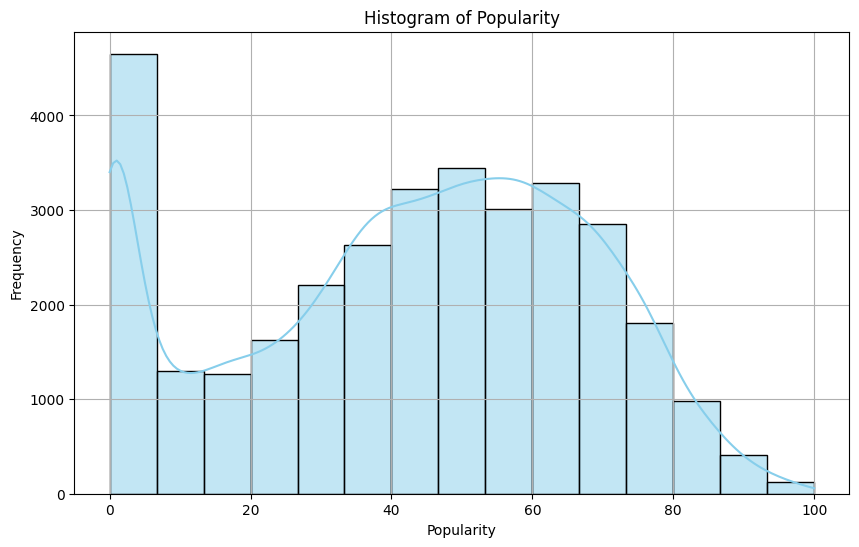

In [26]:
# histograms

plt.figure(figsize=(10,6)) #regula el tamaño, lo hace más grande
sns.histplot(spotifyClean['track_popularity'], 
            bins=15, #cuantas columnas
            color='skyblue', edgecolor='black', kde = True
            )
#plt.xscale('log')
plt.title('Histogram of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [27]:
print("Songs: ", spotifyClean.track_popularity.count(), '\n')
print("Songs at 0: ", spotifyClean[spotifyClean.track_popularity == 0].track_popularity.count(), '\n')
print("Songs bellow 10: ", spotifyClean[spotifyClean.track_popularity < 10].track_popularity.count(), '\n')

Songs:  32828 

Songs at 0:  2698 

Songs bellow 10:  5238 



It would be interesting to investigate which would be the differences in the results if taking into account the 0. The tail is a bit stange. 

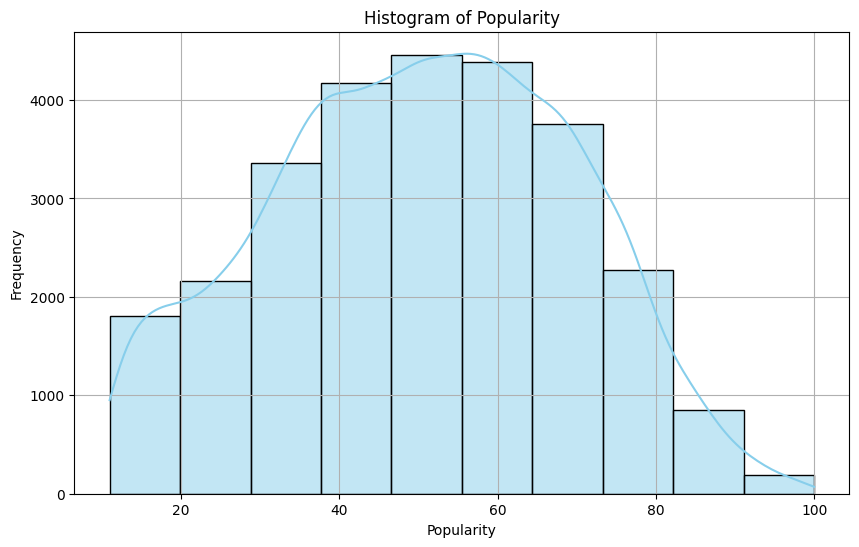

In [28]:
# histograms

plt.figure(figsize=(10,6)) #regula el tamaño, lo hace más grande
sns.histplot(spotifyClean[spotifyClean['track_popularity'] > 10]['track_popularity'], 
            bins=10, #cuantas columnas
            color='skyblue', edgecolor='black', kde = True
            )
#plt.xscale('log')
plt.title('Histogram of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### 4.2.2 Exploration between Variables

In [29]:
spotifyClean.columns

Index(['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'age_song', 'genre_subgenre'],
      dtype='object')

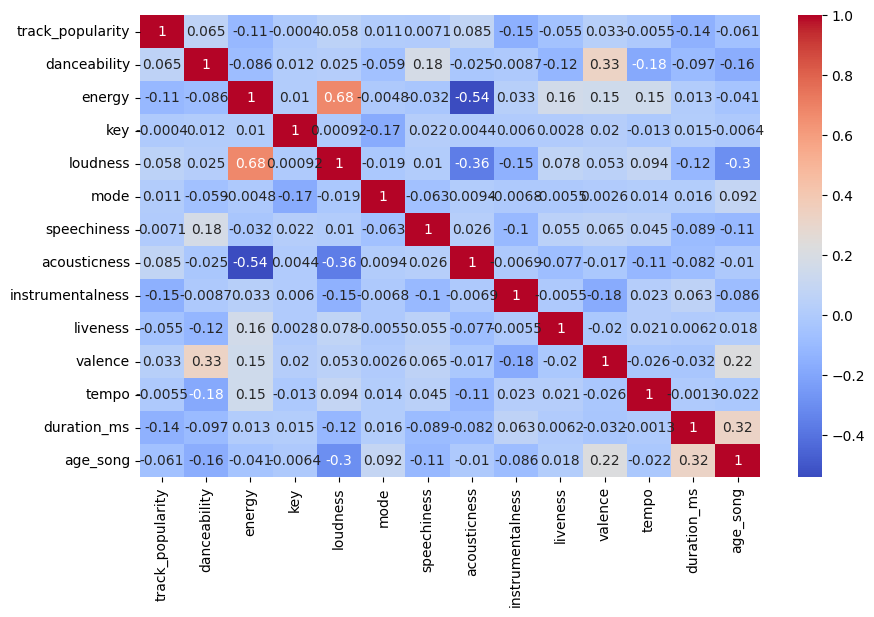

In [30]:
#compute correlations
plt.figure(figsize=(10,6))
correlation_matrix = spotifyClean.corr(numeric_only=True)
correlation_matrix

sns.heatmap(correlation_matrix, 
            annot=True, #put numbers of correlation 
            cmap='coolwarm')
plt.show()

- Target Variable = Popularity
- The less energy, the more popular
- The less instrumental, the more popular
- The less its duration, the more popular.
- Time should be there? Oldies but goldies?

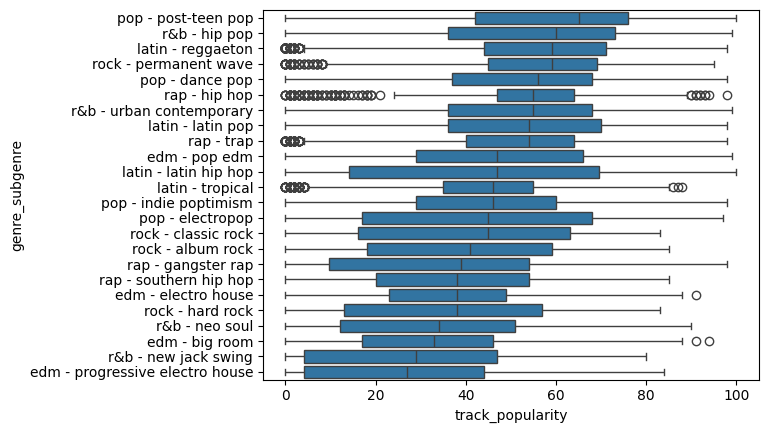

In [31]:
sns.boxplot(data=spotifyClean, y='genre_subgenre', x='track_popularity',
            order = spotifyClean.groupby('genre_subgenre')['track_popularity'].median().sort_values(ascending=False).index)
plt.show()

- Pop, hip hop, latin have >50 medina, which mean that in general people prefer (more popular) those sounds, whereas edm, r&b and rock (in general) have lower medians. These are more niche genres, whereas the first ones are trendy.
- rap-hiphop is one of the genres that people the songs tend to have the same popularity, maybe due to have a nich fanbase; but there are some songs that are either SUPER POPULAR (social media, trends?) or not known at all. 
- pop - post-teen is a very broad genre. the majority are ok tending to be popular songs. maybe due to the radio transmissions, social media, etc. 
- See relationships between the rhythm, age of the song, genres and popularity. Classic Rock can be the example that is not popular, most popular songs are the most famous ones. 

In [32]:
spotifyClean[spotifyClean.track_popularity < 10].genre_subgenre.value_counts()

genre_subgenre
edm - progressive electro house    580
r&b - neo soul                     391
rap - gangster rap                 364
latin - latin hip hop              355
r&b - new jack swing               350
rock - hard rock                   339
rap - southern hip hop             287
pop - indie poptimism              251
pop - electropop                   246
rock - classic rock                239
edm - big room                     217
rock - album rock                  215
edm - electro house                207
edm - pop edm                      191
r&b - urban contemporary           132
latin - latin pop                  129
latin - reggaeton                  128
latin - tropical                   125
rap - trap                         111
r&b - hip pop                      100
pop - post-teen pop                 94
rap - hip hop                       64
rock - permanent wave               62
pop - dance pop                     61
Name: count, dtype: int64

In [33]:
centroid_mean = spotifyClean.groupby("genre_subgenre").mean()
centroid_mean.head()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,age_song
genre_subgenre,,,,,,,,,,,,,,
edm - big room,32.282753,0.619551,0.860316,5.430348,-4.703041,0.491708,0.093293,0.042411,0.238905,0.251372,0.324091,128.872881,203852.392206,2.806799
edm - electro house,35.510258,0.701628,0.800044,5.378557,-5.842447,0.550629,0.093483,0.092875,0.321228,0.192536,0.428701,124.976406,216682.578425,2.485771
edm - pop edm,45.686223,0.647744,0.742543,5.334871,-5.453845,0.538563,0.085093,0.136459,0.047935,0.196825,0.464772,123.169141,205710.918260,2.956493
edm - progressive electro house,26.867883,0.645908,0.816206,5.292427,-5.541605,0.498065,0.077971,0.051983,0.262385,0.214263,0.374506,126.538718,254006.402985,4.762300
latin - latin hip hop,43.477341,0.723141,0.726241,5.535347,-6.194744,0.516012,0.123409,0.152980,0.043981,0.176936,0.618257,119.141262,225623.846526,7.074924


In [34]:
centroid_median = spotifyClean.groupby("genre_subgenre").median()
centroid_median.head()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,age_song
genre_subgenre,,,,,,,,,,,,,,
edm - big room,33.0,0.627,0.892,5.0,-4.450,0.0,0.06495,0.008155,0.021200,0.1885,0.296,127.999,192100.0,1.0
edm - electro house,38.0,0.708,0.833,6.0,-5.356,1.0,0.06450,0.017700,0.135000,0.1260,0.400,125.968,200625.0,2.0
edm - pop edm,47.0,0.655,0.761,6.0,-5.098,1.0,0.05690,0.061900,0.000005,0.1340,0.458,124.955,201506.0,2.0
edm - progressive electro house,27.0,0.651,0.839,5.0,-5.002,0.0,0.05670,0.013400,0.014700,0.1390,0.346,127.956,218437.0,4.0
latin - latin hip hop,47.0,0.731,0.744,6.0,-5.558,1.0,0.08220,0.082900,0.000003,0.1190,0.642,114.992,217573.0,4.0


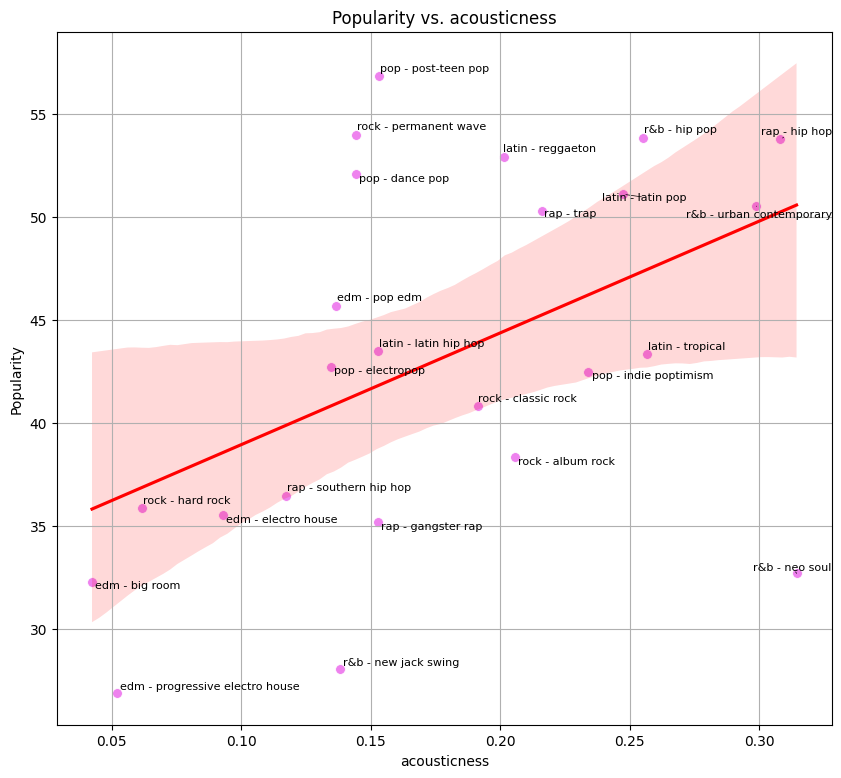

In [44]:
from adjustText import adjust_text

plt.figure(figsize=(10,9))
sns.scatterplot(data=centroid_mean, x="acousticness", y="track_popularity",
                color="violet", s=50, legend=False)
sns.regplot(data=centroid_mean, x="acousticness", y="track_popularity",
            scatter=False, color="red", label="Tendencia")

#function for setting the labels passing the matrix we're passing and the x-y for 
# scatter plot
def setLabels(mat, xl, yl): 
    texts = []
    for idx, row in mat.iterrows():
        texts.append(
            plt.text(row[xl], row[yl], idx, fontsize=8)
        )
    return texts

adjust_text(setLabels(centroid_mean, 'acousticness', 'track_popularity'), 
            arrowprops=dict(arrowstyle="-", lw=0.5))

plt.title("Popularity vs. acousticness")
plt.xlabel("acousticness")
plt.ylabel("Popularity")
plt.grid()

plt.show()

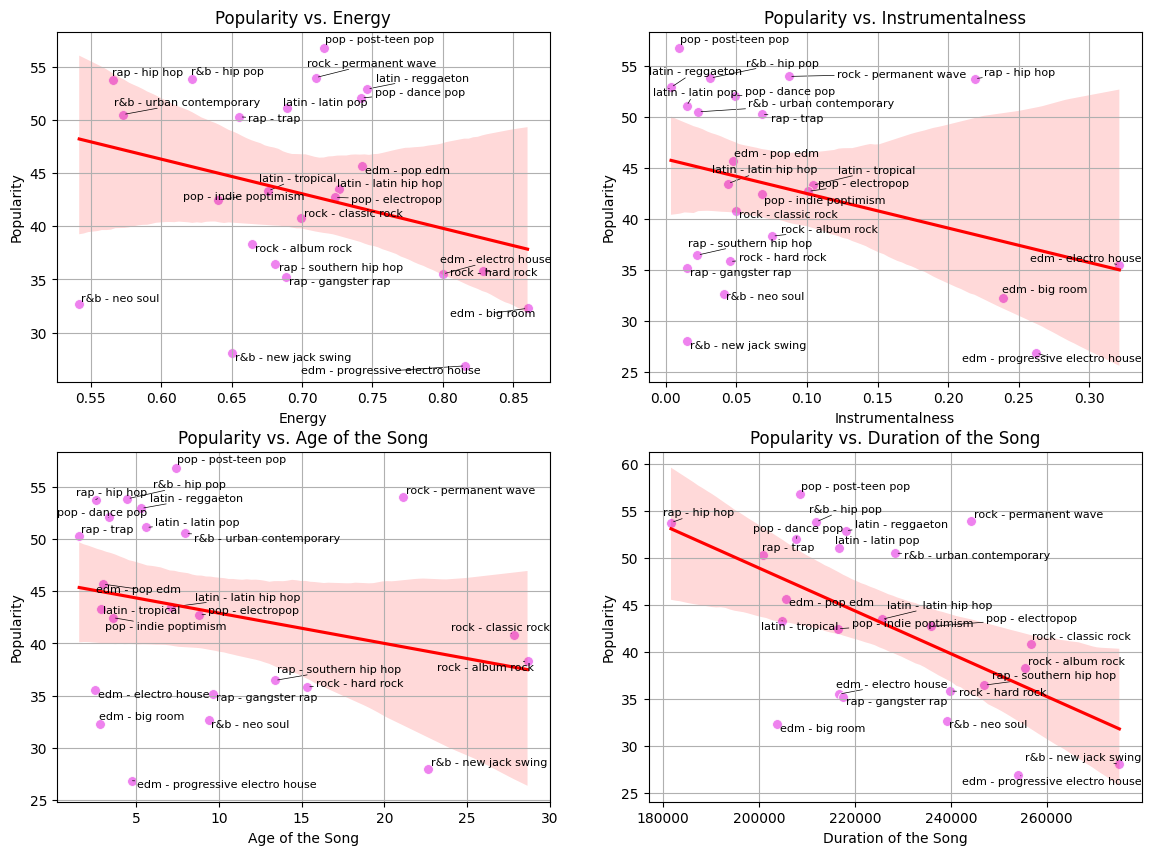

In [43]:
from adjustText import adjust_text

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 1. Scatterplot Popularity vs Energy
sns.scatterplot(data=centroid_mean, x="energy", y="track_popularity",
                color="violet", s=50, legend=False, ax=axs[0, 0])
sns.regplot(data=centroid_mean, x="energy", y="track_popularity",
            scatter=False, color="red", label="Tendencia", ax=axs[0,0])

#function for setting the labels passing the matrix we're passing and the x-y for 
# scatter plot
def setLabels(mat, xl, yl, axis): 
    texts = []
    for idx, row in mat.iterrows():
        texts.append(
            axis.text(row[xl], row[yl], idx, fontsize=8)
        )
    return texts

adjust_text(setLabels(centroid_mean, 'energy', 'track_popularity', axs[0, 0]), 
            ax=axs[0, 0], #just in this case because we're on a subplot
            arrowprops=dict(arrowstyle="-", lw=0.5))

axs[0,0].set_title("Popularity vs. Energy")
axs[0,0].set_xlabel("Energy")
axs[0,0].set_ylabel("Popularity")
axs[0,0].grid()

# 2. Scatterplot Popularity vs Instrumentalness
sns.scatterplot(data=centroid_mean, x="instrumentalness", y="track_popularity",
                color="violet", s=50, legend=False, ax=axs[0, 1])
sns.regplot(data=centroid_mean, x="instrumentalness", y="track_popularity",
            scatter=False, color="red", label="Tendencia", ax=axs[0,1])

adjust_text(setLabels(centroid_mean, 'instrumentalness', 'track_popularity', axs[0, 1]), 
            ax=axs[0, 1], #just in this case because we're on a subplot
            arrowprops=dict(arrowstyle="-", lw=0.5))

axs[0,1].set_title("Popularity vs. Instrumentalness")
axs[0,1].set_xlabel("Instrumentalness")
axs[0,1].set_ylabel("Popularity")
axs[0,1].grid()

# 3. Scatterplot Popularity vs Age of the Song
sns.scatterplot(data=centroid_mean, x="age_song", y="track_popularity",
                color="violet", s=50, legend=False, ax=axs[1,0])
sns.regplot(data=centroid_mean, x="age_song", y="track_popularity",
            scatter=False, color="red", label="Tendencia", ax=axs[1,0])

adjust_text(setLabels(centroid_mean, 'age_song', 'track_popularity', axs[1,0]), 
            ax=axs[1,0], #just in this case because we're on a subplot
            arrowprops=dict(arrowstyle="-", lw=0.5))

axs[1,0].set_title("Popularity vs. Age of the Song")
axs[1,0].set_xlabel("Age of the Song")
axs[1,0].set_ylabel("Popularity")
axs[1,0].grid()

# 4. Scatterplot Duration vs Age of the Song
sns.scatterplot(data=centroid_mean, x="duration_ms", y="track_popularity",
                color="violet", s=50, legend=False, ax=axs[1,1])
sns.regplot(data=centroid_mean, x="duration_ms", y="track_popularity",
            scatter=False, color="red", label="Tendencia", ax=axs[1,1])

adjust_text(setLabels(centroid_mean, 'duration_ms', 'track_popularity', axs[1,1]), 
            ax=axs[1,1], #just in this case because we're on a subplot
            arrowprops=dict(arrowstyle="-", lw=0.5))

axs[1,1].set_title("Popularity vs. Duration of the Song")
axs[1,1].set_xlabel("Duration of the Song")
axs[1,1].set_ylabel("Popularity")
axs[1,1].grid()

plt.show()

Interesting Facts: 

- Age of the song (time from realease): In the case of the EDM cases, it can be seen that are very niche genres in which is not that known even though it hasn't been that much since their realease. 
- In addition to that, it can be seen that r&b-new jack is a dying genre due to the low popularity and the time that has passed on average from their realease. Whereas rock - permanent wave is a "permanent" genre, not dying as other type of rock.
- Duration: It is pretty evident that the when songs are longer, the popularity decreases. The majority of data tending to be on the percentile .30 of duration.
- The golden point would be: Energy around .72, Instumentness, <0.05, Realeased 7 years ago, and around 210000 ms. 

## 4.3 Deal with outsiders

# 5. PREPROCESSING BEFORE MODELLING

## 5.0 Creating the Dataset for inputing into the model

In [47]:
spotifyClean.head()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,age_song,genre_subgenre
0,66,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,1,pop - dance pop
1,67,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,1,pop - dance pop
2,70,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,1,pop - dance pop
3,60,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,1,pop - dance pop
4,69,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,1,pop - dance pop


In [49]:
sptM = spotifyClean.drop(columns=['track_popularity'])
sptM.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,age_song,genre_subgenre
0,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,1,pop - dance pop
1,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,1,pop - dance pop
2,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,1,pop - dance pop
3,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,1,pop - dance pop
4,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,1,pop - dance pop


In [50]:
y = spotifyClean[['track_popularity']]
y.head()

,track_popularity
0,66
1,67
2,70
3,60
4,69


## 5.1 Encoding Categorical Features

In [52]:
X = pd.get_dummies(sptM, columns=['genre_subgenre'])
X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,genre_subgenre_r&b - new jack swing,genre_subgenre_r&b - urban contemporary,genre_subgenre_rap - gangster rap,genre_subgenre_rap - hip hop,genre_subgenre_rap - southern hip hop,genre_subgenre_rap - trap,genre_subgenre_rock - album rock,genre_subgenre_rock - classic rock,genre_subgenre_rock - hard rock,genre_subgenre_rock - permanent wave
0,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,...,False,False,False,False,False,False,False,False,False,False
1,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,...,False,False,False,False,False,False,False,False,False,False
2,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,...,False,False,False,False,False,False,False,False,False,False
3,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,...,False,False,False,False,False,False,False,False,False,False
4,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,...,False,False,False,False,False,False,False,False,False,False


## 5.2 Divide into Train and Test Set

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [79]:
#X_train.columns
X_train.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,genre_subgenre_r&b - new jack swing,genre_subgenre_r&b - urban contemporary,genre_subgenre_rap - gangster rap,genre_subgenre_rap - hip hop,genre_subgenre_rap - southern hip hop,genre_subgenre_rap - trap,genre_subgenre_rock - album rock,genre_subgenre_rock - classic rock,genre_subgenre_rock - hard rock,genre_subgenre_rock - permanent wave
21563,0.664,0.831,2,-4.472,0,0.0435,0.11100,0.000001,0.0596,0.696,...,False,True,False,False,False,False,False,False,False,False
30187,0.720,0.560,8,-8.928,1,0.0527,0.00781,0.000004,0.0744,0.324,...,False,False,False,False,False,False,False,False,False,False
6580,0.795,0.779,11,-5.413,1,0.1770,0.10900,0.000014,0.0836,0.783,...,False,False,False,True,False,False,False,False,False,False
20908,0.726,0.952,8,-1.483,0,0.2170,0.03240,0.000000,0.1910,0.655,...,False,False,False,False,False,False,False,False,False,False
20150,0.834,0.934,2,-2.898,1,0.1730,0.06510,0.000795,0.0523,0.592,...,False,False,False,False,False,False,False,False,False,False


## 5.3 Scaling Numerical Features

In [80]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardize the data X
scaler_X = StandardScaler()
# first, we need to fit the scaler with the train dataset
scaler_X.fit(X_train)
X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

#In the case of Y, we don't want to have a popularity score of 120, so we scale it
y_scaler = MinMaxScaler(feature_range=(0, 1))
y_scaler.fit(y_train)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [58]:
print("Y trained:", y_train, '\n')
print("Y trained scaled:", y_train_scaled, '\n')

Y trained:        track_popularity
21563                81
30187                29
6580                 60
20908                32
20150                 0
...                 ...
16853                35
6265                 57
11287                46
860                  31
15798                25

[26262 rows x 1 columns] 

Y trained scaled: [[0.81]
 [0.29]
 [0.6 ]
 ...
 [0.46]
 [0.31]
 [0.25]] 



# 6. MODELLING

## Model: XGBoost Regressor

### 6.1 Construct the Model

In [84]:
import xgboost as xgb

xgbReg = xgb.XGBRegressor(objective="reg:squarederror", random_state=42,
                          tree_method="hist", 
                          early_stopping_rounds=75, #50-100 for regression
                          scoring='r2',
                          n_jobs=-1) 

xgbReg.fit(X_train,y_train, 
           eval_set=[(X_test, y_test)],verbose=True)

""" xgbReg.fit(X_train,y_train_scaled, 
           eval_set=[(X_test, y_test_scaled)],verbose=True) """

""" xgbReg.fit(X_train_scaled,y_train_scaled, 
           eval_set=[(X_test_scaled, y_test_scaled)],verbose=True) """

[0]	validation_0-rmse:23.76834
[1]	validation_0-rmse:23.17889
[2]	validation_0-rmse:22.77171
[3]	validation_0-rmse:22.48287
[4]	validation_0-rmse:22.32158
[5]	validation_0-rmse:22.17376
[6]	validation_0-rmse:22.03138
[7]	validation_0-rmse:21.92930
[8]	validation_0-rmse:21.85637
[9]	validation_0-rmse:21.81982
[10]	validation_0-rmse:21.75247
[11]	validation_0-rmse:21.72634
[12]	validation_0-rmse:21.70024
[13]	validation_0-rmse:21.67944
[14]	validation_0-rmse:21.65255
[15]	validation_0-rmse:21.62387
[16]	validation_0-rmse:21.60096
[17]	validation_0-rmse:21.58229
[18]	validation_0-rmse:21.56746
[19]	validation_0-rmse:21.53846
[20]	validation_0-rmse:21.51864
[21]	validation_0-rmse:21.49123
[22]	validation_0-rmse:21.48225
[23]	validation_0-rmse:21.47043
[24]	validation_0-rmse:21.43349
[25]	validation_0-rmse:21.42236
[26]	validation_0-rmse:21.42408
[27]	validation_0-rmse:21.38593
[28]	validation_0-rmse:21.35451


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\callback.py:386: UserWarning: [22:19:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "scoring" } are not used.

  self.starting_round = model.num_boosted_rounds()


[29]	validation_0-rmse:21.35288
[30]	validation_0-rmse:21.34137
[31]	validation_0-rmse:21.33591
[32]	validation_0-rmse:21.33951
[33]	validation_0-rmse:21.33791
[34]	validation_0-rmse:21.33710
[35]	validation_0-rmse:21.33966
[36]	validation_0-rmse:21.33771
[37]	validation_0-rmse:21.32850
[38]	validation_0-rmse:21.32512
[39]	validation_0-rmse:21.31996
[40]	validation_0-rmse:21.30804
[41]	validation_0-rmse:21.29468
[42]	validation_0-rmse:21.30711
[43]	validation_0-rmse:21.29744
[44]	validation_0-rmse:21.29396
[45]	validation_0-rmse:21.28773
[46]	validation_0-rmse:21.29186
[47]	validation_0-rmse:21.27135
[48]	validation_0-rmse:21.25099
[49]	validation_0-rmse:21.25416
[50]	validation_0-rmse:21.25084
[51]	validation_0-rmse:21.26074
[52]	validation_0-rmse:21.26482
[53]	validation_0-rmse:21.26852
[54]	validation_0-rmse:21.26028
[55]	validation_0-rmse:21.25968
[56]	validation_0-rmse:21.26658
[57]	validation_0-rmse:21.26920
[58]	validation_0-rmse:21.27685
[59]	validation_0-rmse:21.27403
[60]	val

' xgbReg.fit(X_train_scaled,y_train_scaled, \n           eval_set=[(X_test_scaled, y_test_scaled)],verbose=True) '

In [99]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Definir grid de parámetros
param_distributions = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 9, 12],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2, 0.5],
    'reg_alpha': [0, 0.1, 0.5, 1],  # L1 regularization
    'reg_lambda': [1, 1.5, 2, 3]    # L2 regularization
}

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", 
                              random_state=42,
                              tree_method="hist")

random_search = RandomizedSearchCV(
    xgb_model, 
    param_distributions, 
    n_iter=20,  # número de combinaciones a probar
    cv=5, 
    scoring='r2',
    random_state=42,
    verbose=2,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Mejores parámetros:", random_search.best_params_)
print("Mejor R²:", random_search.best_score_)

# Usar el mejor modelo
best_xgb = random_search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores parámetros: {'subsample': 0.8, 'reg_lambda': 2, 'reg_alpha': 0.5, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 12, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.6}
Mejor R²: 0.33398393392562864


### 6.2 Evaluate the Model

In [141]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_pred = xgbReg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse.__round__(2))
print("Mean Absolute Error:", mae.__round__(2))
print("R-squared:", r2.__round__(2))

Mean Squared Error: 448.32
Mean Absolute Error: 17.27
R-squared: 0.27


In [139]:
""" y_pred_scaled = best_xgb.predict(X_test)
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)) """
y_pred1 = best_xgb.predict(X_test)

In [142]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mae = mean_absolute_error(y_test, y_pred1)
mse = mean_squared_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)

print("Mean Squared Error:", mse.__round__(2))
print("Mean Absolute Error:", mae.__round__(2))
print("R-squared:", r2.__round__(2))

Mean Squared Error: 410.21
Mean Absolute Error: 16.17
R-squared: 0.33


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

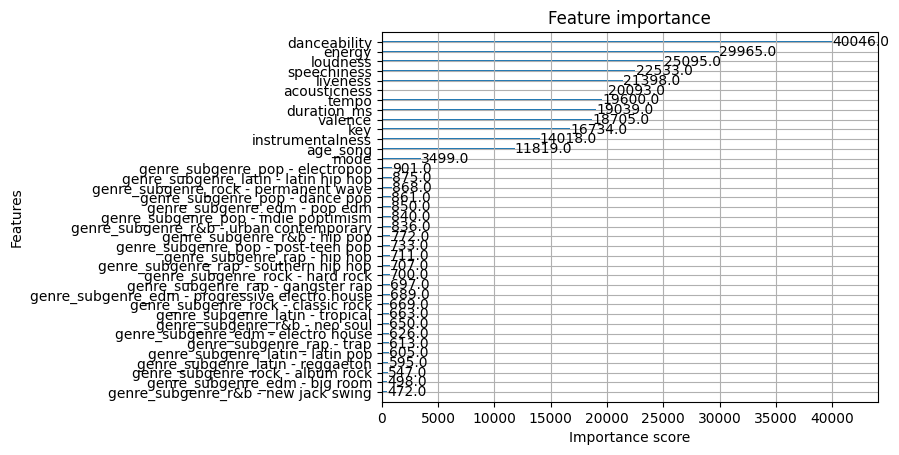

In [ ]:
xgb.plot_importance(best_xgb)

As it can be seen, there is an elbow on age_song

### Check new model with the most important features

In [107]:
scores = best_xgb.get_booster().get_score(importance_type='weight')
print(scores)

{'danceability': 40046.0, 'energy': 29965.0, 'key': 16734.0, 'loudness': 25095.0, 'mode': 3499.0, 'speechiness': 22533.0, 'acousticness': 20093.0, 'instrumentalness': 14018.0, 'liveness': 21398.0, 'valence': 18705.0, 'tempo': 19600.0, 'duration_ms': 19039.0, 'age_song': 11819.0, 'genre_subgenre_edm - big room': 498.0, 'genre_subgenre_edm - electro house': 626.0, 'genre_subgenre_edm - pop edm': 850.0, 'genre_subgenre_edm - progressive electro house': 689.0, 'genre_subgenre_latin - latin hip hop': 875.0, 'genre_subgenre_latin - latin pop': 605.0, 'genre_subgenre_latin - reggaeton': 595.0, 'genre_subgenre_latin - tropical': 663.0, 'genre_subgenre_pop - dance pop': 861.0, 'genre_subgenre_pop - electropop': 901.0, 'genre_subgenre_pop - indie poptimism': 840.0, 'genre_subgenre_pop - post-teen pop': 733.0, 'genre_subgenre_r&b - hip pop': 772.0, 'genre_subgenre_r&b - neo soul': 650.0, 'genre_subgenre_r&b - new jack swing': 472.0, 'genre_subgenre_r&b - urban contemporary': 836.0, 'genre_subgenr

In [116]:
score_sort = sorted(scores.items(), key=lambda x: x[1], reverse=True)

In [117]:
importance_df = pd.DataFrame(
    score_sort,
    columns=['feature', 'importance']
)
importance_df

,feature,importance
0,danceability,40046.0
1,energy,29965.0
2,loudness,25095.0
3,speechiness,22533.0
4,liveness,21398.0
5,acousticness,20093.0
6,tempo,19600.0
7,duration_ms,19039.0
8,valence,18705.0
9,key,16734.0


As it can be seen, until feature 12 (11) are the most important ones, so select those.

In [120]:
imp_feat = importance_df.iloc[:12, 0]
print(imp_feat)

0         danceability
1               energy
2             loudness
3          speechiness
4             liveness
5         acousticness
6                tempo
7          duration_ms
8              valence
9                  key
10    instrumentalness
11            age_song
Name: feature, dtype: object


In [125]:
X_trainN = X_train[imp_feat]
X_testN = X_test[imp_feat]

In [131]:
random_search1 = RandomizedSearchCV(
    xgb_model, 
    param_distributions, 
    n_iter=20,  # número de combinaciones a probar
    cv=5, 
    scoring='r2',
    random_state=42,
    verbose=2,
    n_jobs=-1
)

random_search1.fit(X_trainN, y_train)

print("Mejores parámetros:", random_search.best_params_)
print("Mejor R²:", random_search.best_score_)

# Usar el mejor modelo
best_xgb_N = random_search1.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores parámetros: {'subsample': 0.8, 'reg_lambda': 2, 'reg_alpha': 0.5, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 12, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.6}
Mejor R²: 0.33398393392562864


In [132]:
y_predN = best_xgb_N.predict(X_testN)

In [137]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mae = mean_absolute_error(y_test, y_predN)
mse = mean_squared_error(y_test, y_predN)
r2 = r2_score(y_test, y_predN)

print("Mean Squared Error:", mse.__round__(2))
print("Mean Absolute Error:", mae.__round__(2))
print("R-squared:", r2.__round__(2))

Mean Squared Error: 412.12
Mean Absolute Error: 15.51
R-squared: 0.33


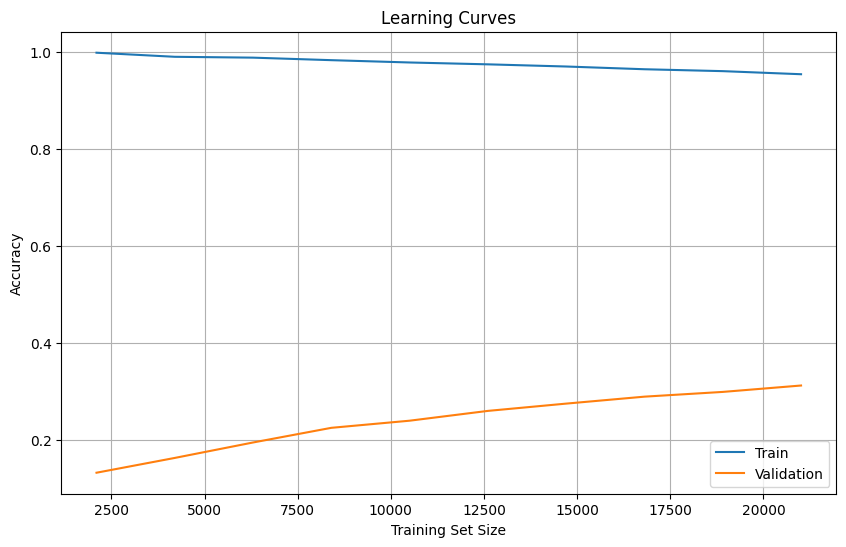

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    best_xgb_N, X_trainN, y_train, cv=5, 
    train_sizes=np.linspace(0.1, 1.0, 10) # Use 10%, 20%, ..., 100% of data
) 

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Train')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid()
plt.show()

# 7. CONCLUSIONS AND ERASE THE DATASET

This model that possesses an R2 ~0.3 at first could be seen as a failed model. However, we need to take into account several factors. 

- This dataset only possesses pure musical features, but not external features. These external features can be: 
    - Promotion of the song by the artist,
    - Campaign in social media
    - Expectation for the song
    - How famous the artist indeed is. 

- As it was observed in the EDA, specifically in the heatmap, there is no clear musical characteristic to determine if the song is going to be famous. There are tendencies, but no definitive one. 
- At last, as this dataset was obtained from the Spotify API, it would be interesting to check how the model would improve if there were more external sociological features.

In [143]:
# Erase the zip
import os
os.remove('./30000-spotify-songs.zip')